# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [4]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [5]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores
print

# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207459e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [6]:
#net.loss(X, y, reg=0.1)
#print "Called"
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133
#print loss
# should be very small, we get < 1e-12
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

b2 max relative error: 1.217779e-10
W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555470e-09


/home/chintan/.local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Final training loss:  0.0192677641894


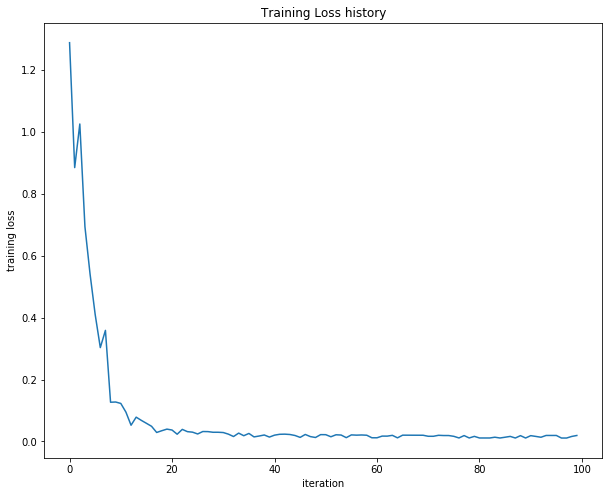

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print 'Final training loss: ', stats['loss_history'][-1]

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [9]:
from cs231n.data_utils import load_CIFAR10
import numpy as np
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [52]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc



iteration 0 / 1000: loss 2.302976 learning rate=0.000100
iteration 100 / 1000: loss 2.295390 learning rate=0.000095
iteration 200 / 1000: loss 2.158734 learning rate=0.000095
iteration 300 / 1000: loss 2.069927 learning rate=0.000090
iteration 400 / 1000: loss 1.950653 learning rate=0.000090
iteration 500 / 1000: loss 1.925551 learning rate=0.000086
iteration 600 / 1000: loss 1.843282 learning rate=0.000086
iteration 700 / 1000: loss 1.881843 learning rate=0.000086
iteration 800 / 1000: loss 1.866323 learning rate=0.000081
iteration 900 / 1000: loss 1.788387 learning rate=0.000081
Validation accuracy:  0.372


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

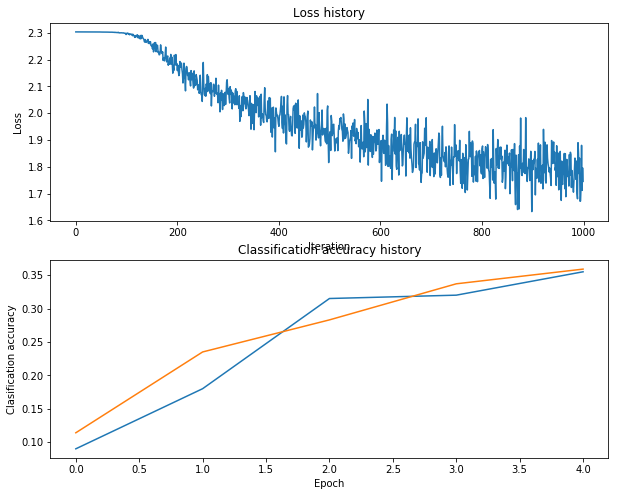

In [53]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [ ]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

model_list=[]

In [82]:
best_net = None # store the best model into this 
num_iters=[5000,10000]
batch_size=[200,500]
learning_rate=[1e-3,5e-4]
learning_rate_decay=[0.95]
reg=[0]
mu_values=[0.1,0.2]
best_acc=0
best_params={}
input_size = 32 * 32 * 3
hidden_size = [200]
num_classes = 10
#net = TwoLayerNet(input_size, hidden_size, num_classes)
print "need total runs",len(mu_values)*len(num_iters)*len(batch_size)*len(learning_rate)*len(learning_rate_decay)*len(hidden_size)*len(reg)
# Train the network
'''
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=500,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)
'''
remaining=len(num_iters)*len(batch_size)*len(learning_rate)*len(learning_rate_decay)*len(hidden_size)*len(reg)*len(mu_values)
print "HI"
for niter in num_iters:
    for bsize in batch_size:
        for lr in learning_rate:
            for lrd in learning_rate_decay:
                for regu in reg:
                    for hidden in hidden_size:
                        for slow_factor in mu_values:
                            print "remaining runs:",remaining
                            remaining-=1
                            if remaining >9:
                                continue
                            print 'Start for niter=%d,bsize:%d,lr=%f,lrd=%f,regu=%f,hidden=%d,mu=%f'%(niter,bsize,lr,lrd,regu,hidden,slow_factor)
                            net = TwoLayerNet(input_size, hidden, num_classes)
                            stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=niter, batch_size=bsize,
                            learning_rate=lr, learning_rate_decay=lrd,
                            reg=regu, verbose=True,mu=slow_factor)
                            # Predict on the validation set
                            val_acc = (net.predict(X_val) == y_val).mean()
                            print 'Validation accuracy: %f '%val_acc
                            print  'for,niter=%d,bsize=%d,lr=%f,lrd=%f,regu=%f,hidden=%d,mu=%f'%(niter,bsize,lr,lrd,regu,hidden,slow_factor)
                            if val_acc > best_acc:
                                best_acc=val_acc
                                print
                                print "ACCC",val_acc
                                print
                                best_net=net
                                best_params['net']=net
                                best_params['accuracy']=val_acc
                                best_params['iterations']=niter
                                best_params['batchsize']=bsize
                                best_params['hidden']=hidden
                                best_params['learning']=lr
                                best_params['decay']=lrd
                                best_params['regular']=regu
                                best_params['mu']=slow_factor
                            print "BEST ACC:",best_acc
                            print best_params
print "best model"
for x in best_params:
    print x,best_params[x]
                    
                    
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

need total runs 16
HI
remaining runs: 16
remaining runs: 15
remaining runs: 14
remaining runs: 13
remaining runs: 12
remaining runs: 11
remaining runs: 10
Start for niter=5000,bsize:500,lr=0.000500,lrd=0.950000,regu=0.000000,hidden=200,mu=0.100000
iteration 0 / 5000: loss 2.302588 learning rate=0.000500
iteration 100 / 5000: loss 1.874970 learning rate=0.000451
iteration 200 / 5000: loss 1.738038 learning rate=0.000429
iteration 300 / 5000: loss 1.666011 learning rate=0.000407
iteration 400 / 5000: loss 1.586300 learning rate=0.000387
iteration 500 / 5000: loss 1.484495 learning rate=0.000368
iteration 600 / 5000: loss 1.440521 learning rate=0.000349
iteration 700 / 5000: loss 1.413940 learning rate=0.000332
iteration 800 / 5000: loss 1.469311 learning rate=0.000315
iteration 900 / 5000: loss 1.349791 learning rate=0.000299
iteration 1000 / 5000: loss 1.358695 learning rate=0.000284
iteration 1100 / 5000: loss 1.296587 learning rate=0.000270
iteration 1200 / 5000: loss 1.289098 learnin

iteration 1700 / 10000: loss 1.242710 learning rate=0.000698
iteration 1800 / 10000: loss 1.169537 learning rate=0.000663
iteration 1900 / 10000: loss 1.109554 learning rate=0.000663
iteration 2000 / 10000: loss 1.345748 learning rate=0.000630
iteration 2100 / 10000: loss 1.211842 learning rate=0.000630
iteration 2200 / 10000: loss 1.252238 learning rate=0.000630
iteration 2300 / 10000: loss 1.156886 learning rate=0.000599
iteration 2400 / 10000: loss 1.008921 learning rate=0.000599
iteration 2500 / 10000: loss 1.237829 learning rate=0.000569
iteration 2600 / 10000: loss 0.986727 learning rate=0.000569
iteration 2700 / 10000: loss 0.946322 learning rate=0.000540
iteration 2800 / 10000: loss 1.083416 learning rate=0.000540
iteration 2900 / 10000: loss 1.103166 learning rate=0.000540
iteration 3000 / 10000: loss 1.022023 learning rate=0.000513
iteration 3100 / 10000: loss 0.989181 learning rate=0.000513
iteration 3200 / 10000: loss 1.039339 learning rate=0.000488
iteration 3300 / 10000: 

iteration 4400 / 10000: loss 0.765108 learning rate=0.000397
iteration 4500 / 10000: loss 0.885386 learning rate=0.000377
iteration 4600 / 10000: loss 0.788337 learning rate=0.000377
iteration 4700 / 10000: loss 0.816813 learning rate=0.000358
iteration 4800 / 10000: loss 0.867874 learning rate=0.000358
iteration 4900 / 10000: loss 0.640181 learning rate=0.000358
iteration 5000 / 10000: loss 0.797028 learning rate=0.000341
iteration 5100 / 10000: loss 0.736536 learning rate=0.000341
iteration 5200 / 10000: loss 0.802505 learning rate=0.000324
iteration 5300 / 10000: loss 0.825033 learning rate=0.000324
iteration 5400 / 10000: loss 0.723406 learning rate=0.000307
iteration 5500 / 10000: loss 0.758778 learning rate=0.000307
iteration 5600 / 10000: loss 0.812298 learning rate=0.000307
iteration 5700 / 10000: loss 0.614908 learning rate=0.000292
iteration 5800 / 10000: loss 0.736826 learning rate=0.000292
iteration 5900 / 10000: loss 0.760167 learning rate=0.000277
iteration 6000 / 10000: 

iteration 7100 / 10000: loss 0.725950 learning rate=0.000113
iteration 7200 / 10000: loss 0.722779 learning rate=0.000107
iteration 7300 / 10000: loss 0.812747 learning rate=0.000107
iteration 7400 / 10000: loss 0.849117 learning rate=0.000102
iteration 7500 / 10000: loss 0.843302 learning rate=0.000102
iteration 7600 / 10000: loss 0.869827 learning rate=0.000097
iteration 7700 / 10000: loss 0.795479 learning rate=0.000097
iteration 7800 / 10000: loss 0.770067 learning rate=0.000097
iteration 7900 / 10000: loss 0.660899 learning rate=0.000092
iteration 8000 / 10000: loss 0.666322 learning rate=0.000092
iteration 8100 / 10000: loss 0.693197 learning rate=0.000087
iteration 8200 / 10000: loss 0.811527 learning rate=0.000087
iteration 8300 / 10000: loss 0.752194 learning rate=0.000087
iteration 8400 / 10000: loss 0.558741 learning rate=0.000083
iteration 8500 / 10000: loss 0.699373 learning rate=0.000083
iteration 8600 / 10000: loss 0.656972 learning rate=0.000079
iteration 8700 / 10000: 

iteration 9800 / 10000: loss 0.659793 learning rate=0.000064
iteration 9900 / 10000: loss 0.573683 learning rate=0.000061
Validation accuracy: 0.529000 
for,niter=10000,bsize=200,lr=0.000500,lrd=0.950000,regu=0.000000,hidden=200,mu=0.200000
BEST ACC: 0.557
{'iterations': 5000, 'decay': 0.95, 'batchsize': 500, 'mu': 0.2, 'regular': 0, 'learning': 0.0005, 'net': <cs231n.classifiers.neural_net.TwoLayerNet object at 0x7fcf2a3c7310>, 'hidden': 200, 'accuracy': 0.55700000000000005}
remaining runs: 4
Start for niter=10000,bsize:500,lr=0.001000,lrd=0.950000,regu=0.000000,hidden=200,mu=0.100000
iteration 0 / 10000: loss 2.302599 learning rate=0.001000
iteration 100 / 10000: loss 1.676237 learning rate=0.000902
iteration 200 / 10000: loss 1.621086 learning rate=0.000857
iteration 300 / 10000: loss 1.550253 learning rate=0.000815
iteration 400 / 10000: loss 1.458300 learning rate=0.000774
iteration 500 / 10000: loss 1.403807 learning rate=0.000735
iteration 600 / 10000: loss 1.418637 learning rat

iteration 1800 / 10000: loss 0.980983 learning rate=0.000377
iteration 1900 / 10000: loss 1.039566 learning rate=0.000358
iteration 2000 / 10000: loss 0.916271 learning rate=0.000341
iteration 2100 / 10000: loss 0.909785 learning rate=0.000324
iteration 2200 / 10000: loss 0.965107 learning rate=0.000307
iteration 2300 / 10000: loss 0.955182 learning rate=0.000292
iteration 2400 / 10000: loss 0.957441 learning rate=0.000277
iteration 2500 / 10000: loss 0.845196 learning rate=0.000264
iteration 2600 / 10000: loss 0.837161 learning rate=0.000250
iteration 2700 / 10000: loss 0.805745 learning rate=0.000238
iteration 2800 / 10000: loss 0.868070 learning rate=0.000226
iteration 2900 / 10000: loss 0.878107 learning rate=0.000215
iteration 3000 / 10000: loss 0.865595 learning rate=0.000204
iteration 3100 / 10000: loss 0.812954 learning rate=0.000194
iteration 3200 / 10000: loss 0.792514 learning rate=0.000184
iteration 3300 / 10000: loss 0.766182 learning rate=0.000175
iteration 3400 / 10000: 

iteration 4500 / 10000: loss 1.020089 learning rate=0.000050
iteration 4600 / 10000: loss 1.040214 learning rate=0.000050
iteration 4700 / 10000: loss 1.056703 learning rate=0.000050
iteration 4800 / 10000: loss 1.015535 learning rate=0.000050
iteration 4900 / 10000: loss 1.065543 learning rate=0.000050
iteration 5000 / 10000: loss 0.965418 learning rate=0.000050
iteration 5100 / 10000: loss 1.030404 learning rate=0.000050
iteration 5200 / 10000: loss 0.973882 learning rate=0.000050
iteration 5300 / 10000: loss 1.011889 learning rate=0.000050
iteration 5400 / 10000: loss 0.983597 learning rate=0.000050
iteration 5500 / 10000: loss 0.966979 learning rate=0.000050
iteration 5600 / 10000: loss 1.002769 learning rate=0.000050
iteration 5700 / 10000: loss 1.095119 learning rate=0.000050
iteration 5800 / 10000: loss 0.942261 learning rate=0.000050
iteration 5900 / 10000: loss 0.962842 learning rate=0.000050
iteration 6000 / 10000: loss 0.887944 learning rate=0.000050
iteration 6100 / 10000: 

iteration 7200 / 10000: loss 0.958027 learning rate=0.000050
iteration 7300 / 10000: loss 0.954758 learning rate=0.000050
iteration 7400 / 10000: loss 0.973845 learning rate=0.000050
iteration 7500 / 10000: loss 1.055701 learning rate=0.000050
iteration 7600 / 10000: loss 0.896924 learning rate=0.000050
iteration 7700 / 10000: loss 0.964088 learning rate=0.000050
iteration 7800 / 10000: loss 0.888554 learning rate=0.000050
iteration 7900 / 10000: loss 0.959440 learning rate=0.000050
iteration 8000 / 10000: loss 0.877640 learning rate=0.000050
iteration 8100 / 10000: loss 0.841410 learning rate=0.000050
iteration 8200 / 10000: loss 0.947154 learning rate=0.000050
iteration 8300 / 10000: loss 0.843081 learning rate=0.000050
iteration 8400 / 10000: loss 0.876164 learning rate=0.000050
iteration 8500 / 10000: loss 0.834038 learning rate=0.000050
iteration 8600 / 10000: loss 0.940554 learning rate=0.000050
iteration 8700 / 10000: loss 0.933098 learning rate=0.000050
iteration 8800 / 10000: 

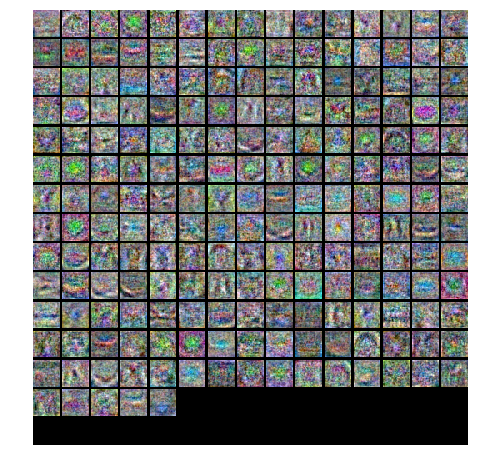

In [83]:
# visualize the weights of the best network
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)


# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [1]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc
model_list.append([best_net,test_acc])

NameError: name 'best_net' is not defined

In [2]:
print len(model_list)

NameError: name 'model_list' is not defined